In [107]:
cd /content/drive/My Drive/Loan Prediction

/content/drive/My Drive/Loan Prediction


In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Load Dataset

In [109]:
data=pd.read_csv('dataset.csv')

In [110]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA

In [111]:
data.drop(['Loan_ID'],axis=1,inplace=True)

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [113]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [114]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


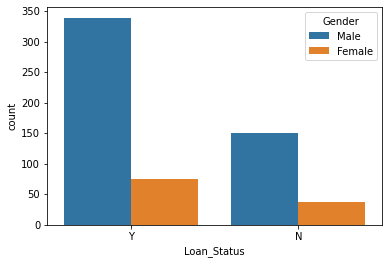

In [115]:
import seaborn as sns
sns.countplot(data['Loan_Status'],hue=data['Gender'])

Male are having more chance of getting loan than Female

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


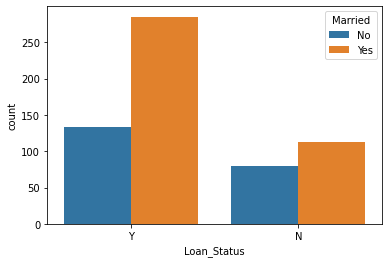

In [116]:
sns.countplot(data['Loan_Status'],hue=data['Married'])

Married People will get more chance of loan than non married people

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


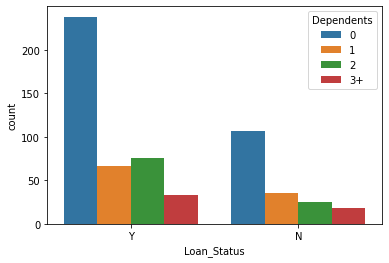

In [117]:
sns.countplot(data['Loan_Status'],hue=data['Dependents'])

As Dependent Count decreases chances of getting loan increases

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


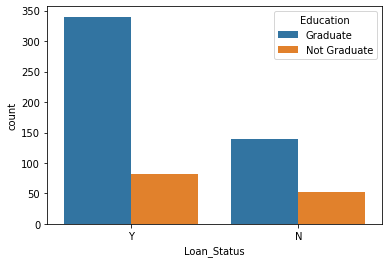

In [118]:
sns.countplot(data['Loan_Status'],hue=data['Education'])

Person who is educated will have a more chance of getting the loan than the non graduate

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


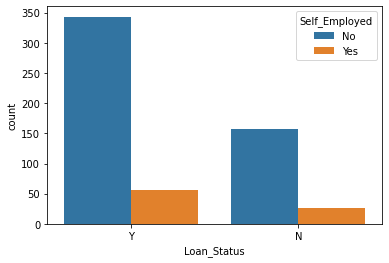

In [119]:
sns.countplot(data['Loan_Status'],hue=data['Self_Employed'])

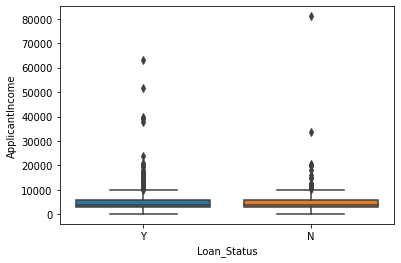

In [120]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=data)

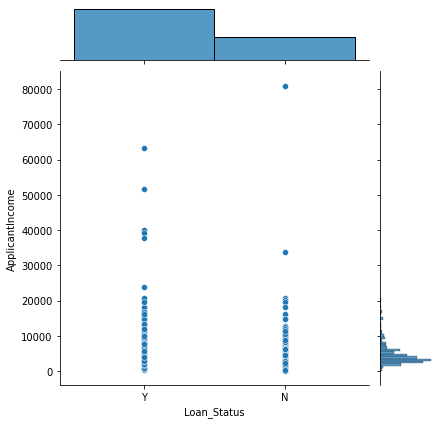

In [121]:
sns.jointplot(x='Loan_Status',y='ApplicantIncome',data=data)

If a person is having more income then he has some chance of getting loan but we are not so confident as these may be outliers

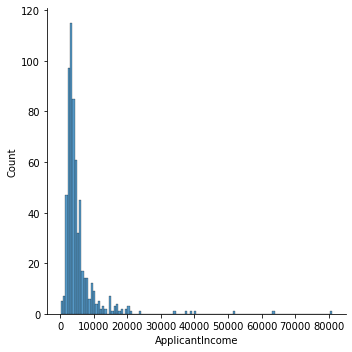

In [122]:
sns.displot(data['ApplicantIncome'])

Mostly applicant's income is between 0K-15K

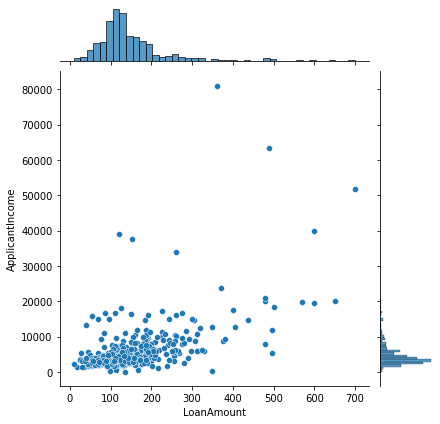

In [123]:
sns.jointplot(x='LoanAmount',y='ApplicantIncome',data=data)

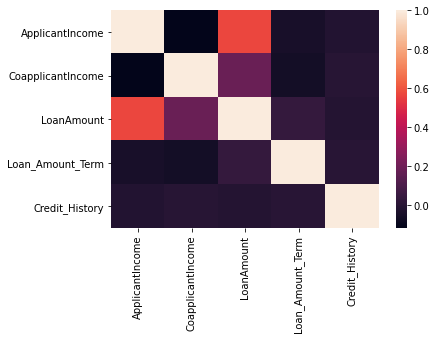

In [124]:
corr=data.corr()
sns.heatmap(corr)

In [125]:
data.drop(['LoanAmount'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


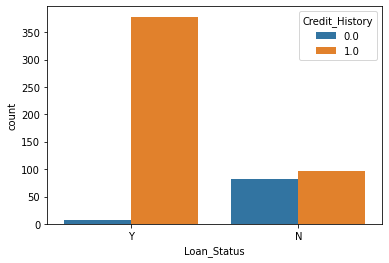

In [126]:
sns.countplot(data['Loan_Status'],hue=data['Credit_History'])

## Handling Missing Values

In [127]:
loan_credit_1Y=data['Loan_Status']=='Y'

In [128]:
loan_credit_1Y=list(loan_credit_1Y)

In [129]:
data.loc[loan_credit_1Y,'Credit_History']=data.loc[loan_credit_1Y,'Credit_History'].fillna(1.0)

In [130]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
Loan_Amount_Term     14
Credit_History       13
Property_Area         0
Loan_Status           0
dtype: int64

In [131]:
loan_credit_0N=data['Loan_Status']=='N'

In [132]:
loan_credit_0N=list(loan_credit_0N)

In [133]:
data.loc[loan_credit_0N,'Credit_History']=data.loc[loan_credit_0N,'Credit_History'].fillna(0.0)

In [134]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [135]:
data.dropna()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,360.0,1.0,Urban,Y


In [136]:
data.dropna(inplace=True,axis=0)

# Data Encoding

In [137]:
from sklearn.preprocessing import LabelEncoder

In [138]:
le=LabelEncoder()

In [139]:
le.fit(data['Gender'])

LabelEncoder()

In [140]:
le.classes_

array(['Female', 'Male'], dtype=object)

In [141]:
data['Gender']=le.transform(data['Gender'])

In [142]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban,Y
1,1,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,N
2,1,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,Y
3,1,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,Y
4,1,No,0,Graduate,No,6000,0.0,360.0,1.0,Urban,Y


In [143]:
le.fit(data['Married'])

LabelEncoder()

In [144]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [145]:
data['Married']=le.transform(data['Married'])

In [146]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,Graduate,No,5849,0.0,360.0,1.0,Urban,Y
1,1,1,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,N
2,1,1,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,Y
3,1,1,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,Y
4,1,0,0,Graduate,No,6000,0.0,360.0,1.0,Urban,Y


In [147]:
le.fit(data['Dependents'])

LabelEncoder()

In [148]:
le.classes_

array(['0', '1', '2', '3+'], dtype=object)

In [149]:
data['Dependents']=le.transform(data['Dependents'])

In [150]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,Graduate,No,5849,0.0,360.0,1.0,Urban,Y
1,1,1,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,N
2,1,1,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,Y
3,1,1,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,Y
4,1,0,0,Graduate,No,6000,0.0,360.0,1.0,Urban,Y


In [151]:
data['Education']=le.fit_transform(data['Education'])

In [152]:
le.classes_

array(['Graduate', 'Not Graduate'], dtype=object)

In [153]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,No,5849,0.0,360.0,1.0,Urban,Y
1,1,1,1,0,No,4583,1508.0,360.0,1.0,Rural,N
2,1,1,0,0,Yes,3000,0.0,360.0,1.0,Urban,Y
3,1,1,0,1,No,2583,2358.0,360.0,1.0,Urban,Y
4,1,0,0,0,No,6000,0.0,360.0,1.0,Urban,Y


In [154]:
data['Self_Employed']=le.fit_transform(data['Self_Employed'])

In [155]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [156]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,360.0,1.0,Urban,Y
1,1,1,1,0,0,4583,1508.0,360.0,1.0,Rural,N
2,1,1,0,0,1,3000,0.0,360.0,1.0,Urban,Y
3,1,1,0,1,0,2583,2358.0,360.0,1.0,Urban,Y
4,1,0,0,0,0,6000,0.0,360.0,1.0,Urban,Y


In [157]:
data['Property_Area']=le.fit_transform(data['Property_Area'])

In [158]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,360.0,1.0,2,Y
1,1,1,1,0,0,4583,1508.0,360.0,1.0,0,N
2,1,1,0,0,1,3000,0.0,360.0,1.0,2,Y
3,1,1,0,1,0,2583,2358.0,360.0,1.0,2,Y
4,1,0,0,0,0,6000,0.0,360.0,1.0,2,Y


In [159]:
le.classes_

array(['Rural', 'Semiurban', 'Urban'], dtype=object)

In [160]:
data['Loan_Status']=le.fit_transform(data['Loan_Status'])

In [161]:
le.classes_

array(['N', 'Y'], dtype=object)

In [162]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,360.0,1.0,2,1


In [163]:
le.fit(data['Credit_History'])

LabelEncoder()

In [164]:
le.classes_

array([0., 1.])

In [165]:
data['Credit_History']=le.transform(data['Credit_History'])

In [166]:
data['Loan_Amount_Term']=le.fit_transform(data['Loan_Amount_Term'])

In [167]:
le.classes_

array([ 12.,  36.,  60.,  84., 120., 180., 240., 300., 360., 480.])

In [168]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,8,1,2,1
1,1,1,1,0,0,4583,1508.0,8,1,0,0
2,1,1,0,0,1,3000,0.0,8,1,2,1
3,1,1,0,1,0,2583,2358.0,8,1,2,1
4,1,0,0,0,0,6000,0.0,8,1,2,1


# MinMax Scaling

In [169]:
from sklearn.preprocessing import MinMaxScaler

In [170]:
mms=MinMaxScaler()

In [172]:
data['ApplicantIncome']=mms.fit_transform(np.array(data['ApplicantIncome']).reshape(-1,1))

In [173]:
mms.data_range_

array([80850.])

In [174]:
mms.data_min_

array([150.])

In [175]:
mms.data_max_

array([81000.])

In [176]:
mmsc=MinMaxScaler()

In [178]:
data['CoapplicantIncome']=mmsc.fit_transform(np.array(data['CoapplicantIncome']).reshape(-1,1))

In [179]:
mmsc.data_range_

array([33837.])

In [180]:
mmsc.data_min_

array([0.])

In [181]:
mmsc.data_max_

array([33837.])

# Splitting The Data

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
x_train,x_test,y_train,y_test=train_test_split(data.drop(['Loan_Status'],axis=1),data['Loan_Status'],test_size=0.2,random_state=42)

In [184]:
x_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
409,1,1,3,0,0,1.000000,0.000000,8,0,0
83,1,1,0,0,0,0.072356,0.066495,8,0,1
402,1,0,0,0,0,0.029066,0.591069,8,1,1
97,1,1,0,0,0,0.022597,0.029465,8,1,1
270,0,0,0,0,0,0.038182,0.000000,8,1,2
...,...,...,...,...,...,...,...,...,...,...
172,1,1,3,1,0,0.041707,0.000000,5,1,0
55,1,1,2,0,0,0.031639,0.034489,8,1,1
106,1,1,2,0,0,0.139357,0.033277,8,1,2
556,0,0,0,0,0,0.031132,0.048024,8,1,2


# *Model Preparation*

## Logistic Regression

In [185]:
from sklearn.linear_model import LogisticRegression

In [186]:
model_lg=LogisticRegression()

In [187]:
model_lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [188]:
y_pred_lr=model_lg.predict(x_test)

## SVM

In [189]:
from sklearn.svm import SVC

In [190]:
model_svm=SVC()

In [191]:
model_svm.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [192]:
y_pred_svm=model_svm.predict(x_test)

## Decision Tree

In [193]:
from sklearn.tree import DecisionTreeClassifier

In [194]:
model_dtc=DecisionTreeClassifier()

In [195]:
model_dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [196]:
y_pred_dtc=model_dtc.predict(x_test)

## RandomForest Classifier

In [197]:
from sklearn.ensemble import RandomForestClassifier

In [198]:
model_rfc=RandomForestClassifier()

In [199]:
model_rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [200]:
y_pred_rfc=model_rfc.predict(x_test)

## Naive Bayes MultinomialDB

In [201]:
from sklearn.naive_bayes import MultinomialNB

In [202]:
model_mnb=MultinomialNB()

In [203]:
model_mnb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [204]:
y_pred_mnb=model_mnb.predict(x_test)

## KNN

In [205]:
from sklearn.neighbors import KNeighborsClassifier

In [207]:
model_knn=KNeighborsClassifier()

In [208]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [209]:
y_pred_knn=model_knn.predict(x_test)

In [210]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1])

# Metrics Measurement

In [212]:
import sklearn.metrics as m

In [223]:
y_predict=[]
for i in range(len(y_test)):
  y_p=[np.array(y_test)[i],y_pred_dtc[i],y_pred_knn[i],y_pred_lr[i],y_pred_mnb[i],y_pred_rfc[i],y_pred_svm[i]]
  y_predict.append(y_p)


In [224]:
y_predictions_all=pd.DataFrame(y_predict,columns=['y_actual','Decision Tree','KNN','Logistic Regression','Multinomial NB','RandomForestClassifier','SupportVectorMachine'])

In [225]:
y_predictions_all

,y_actual,Decision Tree,KNN,Logistic Regression,Multinomial NB,RandomForestClassifier,SupportVectorMachine
0,0,1,1,0,1,0,0
1,0,0,0,0,1,0,0
2,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
104,0,0,1,1,1,1,1
105,1,1,1,1,1,1,1
106,1,1,1,1,1,1,1
107,1,1,1,1,1,1,1


In [226]:
y_models=[y_pred_dtc,y_pred_knn,y_pred_lr,y_pred_mnb,y_pred_rfc,y_pred_svm]

In [227]:
metrics=[]
for y_pred in y_models:
  mt=[m.accuracy_score(y_test,y_pred),m.f1_score(y_test,y_pred),m.log_loss(y_test,y_pred),m.precision_score(y_test,y_pred),m.recall_score(y_test,y_pred)]
  metrics.append(mt)

In [228]:
model_names=['Decision Tree','KNN','Logistic Regression','Multinomial NB','RandomForestClassifier','SupportVectorMachine']

In [229]:
metric_names=['accuracy','f1 score','logloss','precision','recall']

In [232]:
metric_models=pd.DataFrame(metrics,columns=metric_names,index=model_names)

In [233]:
metric_models

,accuracy,f1 score,logloss,precision,recall
Decision Tree,0.715596,0.786207,9.823043,0.826087,0.750000
KNN,0.743119,0.837209,8.872522,0.750000,0.947368
Logistic Regression,0.807339,0.872727,6.654384,0.808989,0.947368
Multinomial NB,0.697248,0.821622,10.456936,0.697248,1.000000
RandomForestClassifier,0.798165,0.860759,6.971232,0.829268,0.894737
SupportVectorMachine,0.807339,0.872727,6.654384,0.808989,0.947368


## Final Evaluation and Saving Model

After seeing the above table we can confidently say that SVM Performs Well

In [234]:
import pickle

In [235]:
pickle.dump(model_svm,open("model_svm.pkl","wb+"),protocol=pickle.HIGHEST_PROTOCOL)